## Exercise 6.1


### Part 1

In [5]:
import pandas as pd
import cv2
import numpy as np
import cv2
from tqdm import tqdm_notebook


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
df = pd.read_csv('/content/drive/MyDrive/Sxolh/lab 6.1/trailers.csv')

In [8]:
df.head()

,trailer_title,url,imdb_id,year,rating,votes,genre
0,THE BIG PARADE trailer,https://archive.org/download/TheBigParadeTrail...,15624,1925,7.9,6148.0,Drama|Romance|War
1,ALL QUIET ON THE WESTERN FRONT 1930 trailer,https://archive.org/download/AllQuietOnTheWest...,20629,1930,8.0,56948.0,Drama|War
2,THE OREGON TRAIL trailer,https://archive.org/download/TheOregonTrailTra...,20691,1926,7.2,3353.0,Adventure|Romance|Western
3,FIVE STAR FINAL trailer,https://archive.org/download/FiveStarFinalTrai...,21873,1931,7.2,1790.0,Crime|Drama
4,LITTLE CAESAR trailer,https://archive.org/download/LittleCaesarTrail...,21079,1931,7.3,11958.0,Action|Crime|Drama|Romance


In [9]:
df['trailer_title']

0                           THE BIG PARADE trailer
1      ALL QUIET ON THE WESTERN FRONT 1930 trailer
2                         THE OREGON TRAIL trailer
3                          FIVE STAR FINAL trailer
4                            LITTLE CAESAR trailer
                          ...                     
937                               IMPOSTOR trailer
938                     THE INVISIBLE BOY trailers
939                           THE WEREWOLF trailer
940                                REBECCA trailer
941                          MARK OF DEVIL trailer
Name: trailer_title, Length: 942, dtype: object

In [10]:
df.sort_values('rating', ascending = True)

,trailer_title,url,imdb_id,year,rating,votes,genre
459,MANOS: THE HANDS OF FATE trailer,https://archive.org/download/MANOSTHEHANDSOFFA...,60666,1966,1.9,34678.0,Horror
467,CATALINA CAPER trailer,https://archive.org/download/CatalinaCaperTrai...,61456,1967,2.1,1787.0,Comedy|Musical|Mystery
311,KING DINOSAUR trailer,https://archive.org/download/KingDinosaurTrail...,48256,1955,2.1,1225.0,Adventure|Sci-Fi
408,EEGAH trailer,https://archive.org/download/EEGAHTrailer/EEGA...,55946,2014,2.2,5410.0,Adventure|Comedy|Fantasy|Horror|Music
430,THE CREEPING TERROR trailer,https://archive.org/download/TheCreepingTerror...,57970,1964,2.2,4069.0,Horror|Sci-Fi
...,...,...,...,...,...,...,...
659,LIFE IS BEAUTIFUL trailers,https://archive.org/download/LifeIsBeautifulTr...,118799,1997,8.6,616571.0,Comedy|Drama|Romance|War
666,SAVING PRIVATE RYAN trailers,https://archive.org/download/SavingPrivateRyan...,120815,1998,8.6,1222955.0,Drama|War
879,INCEPTION trailer,https://archive.org/download/INCEPTIONTrailer_...,1375666,2010,8.8,2042536.0,Action|Adventure|Sci-Fi|Thriller
641,FORREST GUMP trailer,https://archive.org/download/FORRESTGUMPTraile...,109830,1994,8.8,1786771.0,Drama|Romance


I am going to choose the JURASSIC WORLD trailer which is one of my favorite movies

In [12]:
!pip install scenedetect

     |████████████████████████████████| 112kB 12.0MB/s 


In [13]:
from scenedetect import VideoManager
from scenedetect import SceneManager

from scenedetect.detectors import ContentDetector
from scenedetect.scene_manager import generate_images

def find_scenes(video_path, threshold=30.0):
    video_manager = VideoManager([video_path])
    scene_manager = SceneManager()
    scene_manager.add_detector(
        ContentDetector(threshold=threshold))
    base_timecode = video_manager.get_base_timecode()
    video_manager.set_downscale_factor()
    video_manager.start()
    scene_manager.detect_scenes(frame_source=video_manager, show_progress=False)    
    return scene_manager.get_scene_list(base_timecode)

In [15]:
filename = '/content/drive/MyDrive/Sxolh/lab 6.1/JURASSIC WORLD trailer.mp4' # this is our video file
scene_list = find_scenes(filename, threshold=30)

In [16]:
for scene in scene_list:
  print(scene)

(FrameTimecode(frame=0, fps=23.976025), FrameTimecode(frame=120, fps=23.976025))
(FrameTimecode(frame=120, fps=23.976025), FrameTimecode(frame=190, fps=23.976025))
(FrameTimecode(frame=190, fps=23.976025), FrameTimecode(frame=240, fps=23.976025))
(FrameTimecode(frame=240, fps=23.976025), FrameTimecode(frame=305, fps=23.976025))
(FrameTimecode(frame=305, fps=23.976025), FrameTimecode(frame=354, fps=23.976025))
(FrameTimecode(frame=354, fps=23.976025), FrameTimecode(frame=472, fps=23.976025))
(FrameTimecode(frame=472, fps=23.976025), FrameTimecode(frame=657, fps=23.976025))
(FrameTimecode(frame=657, fps=23.976025), FrameTimecode(frame=718, fps=23.976025))
(FrameTimecode(frame=718, fps=23.976025), FrameTimecode(frame=796, fps=23.976025))
(FrameTimecode(frame=796, fps=23.976025), FrameTimecode(frame=833, fps=23.976025))
(FrameTimecode(frame=833, fps=23.976025), FrameTimecode(frame=863, fps=23.976025))
(FrameTimecode(frame=863, fps=23.976025), FrameTimecode(frame=935, fps=23.976025))
(Frame

In [17]:
len(scene_list)

58

#### Question 2

As we can see it has 58 scenes i counted around 55 like the same number maybe the programm has a little more than my eye caught

#### Question 3 

In [ ]:
scene_list = find_scenes(filename, threshold=10)
len(scene_list)

152

In [ ]:
scene_list = find_scenes(filename, threshold=50)
len(scene_list)

45

The number 10 produces so much more scenes than the 30,50 so the 30 is somehow the best option

#### Question 4

In [18]:
scene_list = find_scenes(filename, threshold=30)
cap = cv2.VideoCapture(filename)

frames = []
shot_length = []

for start_time, end_time in scene_list:
    duration = end_time - start_time
    frame = (start_time.get_frames() + int(duration.get_frames() / 2))
    cap.set(cv2.CAP_PROP_POS_FRAMES,frame)
    ret, frame = cap.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frames.append(frame)
    shot_length.append(duration.get_seconds())

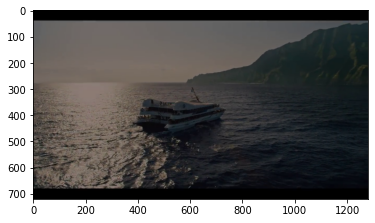

In [19]:
import matplotlib.pyplot as plt

plt.imshow(frames[7]) # print the 7th scene

In [20]:
import os

if not os.path.exists('scenes/'):
    os.mkdir('scenes/')

for i, frame in enumerate(frames):
    cv2.imwrite('scenes/frame_{}.jpg'.format(i), frame)

In [21]:
import tensorflow as tf
from tensorflow import keras


In [22]:
model = keras.models.load_model('/content/drive/MyDrive/Sxolh/lab 6.1/shot_classifier.h5')

In [23]:
def preprocess_frame(frame, single_batch=False,  color_mode='rgb'):
    frame = cv2.resize(frame, dsize=(224, 224), interpolation=cv2.INTER_NEAREST)
    if color_mode == 'grayscale':
        frame = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
    if single_batch:
        frame = tf.expand_dims(frame, 0)
    return frame

processed_frames = [preprocess_frame(frame) for frame in frames]
processed_frames = np.array(processed_frames)
data = tf.data.Dataset.from_tensor_slices(processed_frames).batch(64)

probabilities = model.predict(data, verbose=1)
labels = ['CS', 'ECS', 'FS', 'LS', 'MS']

image_classes = np.argmax(probabilities, axis=1)
image_labels = [labels[image_class] for image_class in image_classes]
print(image_labels)

1/1 [==============================] - 10s 10s/step
['ECS', 'MS', 'CS', 'CS', 'CS', 'LS', 'LS', 'LS', 'ECS', 'MS', 'MS', 'FS', 'ECS', 'ECS', 'FS', 'LS', 'LS', 'CS', 'FS', 'LS', 'FS', 'FS', 'LS', 'MS', 'FS', 'ECS', 'LS', 'MS', 'CS', 'MS', 'CS', 'FS', 'MS', 'FS', 'ECS', 'MS', 'MS', 'CS', 'MS', 'FS', 'CS', 'CS', 'CS', 'FS', 'FS', 'FS', 'FS', 'CS', 'LS', 'FS', 'LS', 'FS', 'FS', 'ECS', 'FS', 'CS', 'FS', 'LS']


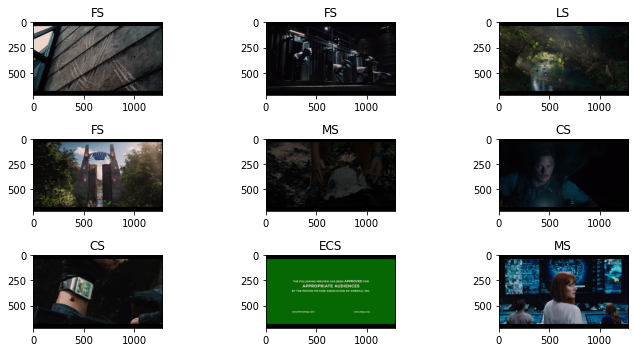

In [24]:
random_indices = np.random.choice(range(len(image_classes)), 
                                  size=9, replace=False)

frames_sample = np.array(frames)[random_indices]
classes_sample = np.array(image_labels)[random_indices]

fig, axes = plt.subplots(nrows = 3, ncols=3, figsize=(10, 5))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(frames_sample[i])
    ax.set_title(classes_sample[i])
plt.tight_layout()

I can see that the model is pretty accurate not completly though.

In [26]:
def process_video(filename, model = model, labels = labels): # we just have to make the same procedure in steps
    # create list of scenes
    scene_list = find_scenes(filename, threshold=30)
    
    # get frame info
    cap = cv2.VideoCapture(filename)
    
    frames = []
    shot_length = []

    for start_time, end_time in scene_list:
        duration = end_time - start_time
        frame = (start_time.get_frames() + int(duration.get_frames() / 2))
        cap.set(cv2.CAP_PROP_POS_FRAMES,frame)
        ret, frame = cap.read()
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frames.append(frame)
        shot_length.append(duration.get_seconds())
    
    # preprocess frames
    processed_frames = [preprocess_frame(frame) for frame in frames]
    processed_frames = np.array(processed_frames)
    data = tf.data.Dataset.from_tensor_slices(processed_frames).batch(64)
    
    # predict labels
    probabilities = model.predict(data, verbose=1)
    image_classes = np.argmax(probabilities, axis=1)
    image_labels = [labels[image_class] for image_class in image_classes]
    
    # create dataframe
    df = pd.DataFrame()
    df['video'] = [filename for i in range(len(frames))]
    df['shot'] = range(len(frames))
    df['shot_length'] = shot_length
    df['shot_type'] = image_labels
    
    return df

In [28]:
test = process_video('/content/drive/MyDrive/Sxolh/lab 6.1/dolphintale-hereyougowinter_h480p.mp4')

1/1 [==============================] - 3s 3s/step


In [29]:
test.head()

,video,shot,shot_length,shot_type
0,/content/drive/MyDrive/Sxolh/lab 6.1/dolphinta...,0,2.460794,FS
1,/content/drive/MyDrive/Sxolh/lab 6.1/dolphinta...,1,1.668335,CS
2,/content/drive/MyDrive/Sxolh/lab 6.1/dolphinta...,2,2.168836,ECS
3,/content/drive/MyDrive/Sxolh/lab 6.1/dolphinta...,3,4.421088,CS
4,/content/drive/MyDrive/Sxolh/lab 6.1/dolphinta...,4,1.960294,MS


### Part 2

In [31]:
trailers = pd.read_csv('/content/drive/MyDrive/Sxolh/lab 6.1/trailers.csv')
trailers.head(5)

,trailer_title,url,imdb_id,year,rating,votes,genre
0,THE BIG PARADE trailer,https://archive.org/download/TheBigParadeTrail...,15624,1925,7.9,6148.0,Drama|Romance|War
1,ALL QUIET ON THE WESTERN FRONT 1930 trailer,https://archive.org/download/AllQuietOnTheWest...,20629,1930,8.0,56948.0,Drama|War
2,THE OREGON TRAIL trailer,https://archive.org/download/TheOregonTrailTra...,20691,1926,7.2,3353.0,Adventure|Romance|Western
3,FIVE STAR FINAL trailer,https://archive.org/download/FiveStarFinalTrai...,21873,1931,7.2,1790.0,Crime|Drama
4,LITTLE CAESAR trailer,https://archive.org/download/LittleCaesarTrail...,21079,1931,7.3,11958.0,Action|Crime|Drama|Romance


In [33]:
n = 6
trailers1920_40 = trailers[(trailers.year > 1920) & (trailers.year < 1940)].sample(n)
trailers1960_80 = trailers[(trailers.year > 1960) & (trailers.year < 1980)].sample(n)
trailers2000 = trailers[trailers.year > 2000].sample(n)

In [35]:
!pip  install  wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=7b9daff38b4a9e4ae55d150f93140259f7dda26f5330e4cb8a63e297f270e943
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [36]:
import wget
from tqdm.notebook import tqdm


def dl_sample(df, folder):
    if not os.path.exists(folder):
        os.mkdir(folder)
    
    video_paths = []
    for video in df.itertuples():
        video_url = video.url
        output_path = folder + video.trailer_title + '.mp4'
        filename = wget.download(video_url, out=output_path)
        video_paths.append(output_path)
        
    return video_paths

In [38]:
trailer1920 = dl_sample(trailers1920_40, 'vid_1920/')
trailer1960 = dl_sample(trailers1960_80, 'vid_1960/')
trailer2000 = dl_sample(trailers2000, 'vid_2000/')

#### Question 3

In [39]:
def process_trailers(videos):# we create the function to loop in all videos
    dfs = []
    for vid in videos:
        dfs.append(process_video(vid))
    return pd.concat(dfs)

#### Question 4

In [41]:
processed_trailers_1920 = process_trailers(trailer1920)
processed_trailers_1960 = process_trailers(trailer1960)
processed_trailers_2000 = process_trailers(trailer2000)


1/1 [==============================] - 7s 7s/step


In [42]:
def statistics(df):
    print('mean shot length:', df.shot.mean())
    print('shot length stdev:', df.shot.std())
    display(df.shot_type.value_counts() / df.shot_type.value_counts().sum())
    
statistics(processed_trailers_1920)
statistics(processed_trailers_1960)
statistics(processed_trailers_2000)

mean shot length: 26.203883495145632
shot length stdev: 21.123056459290446


MS     0.349515
CS     0.233010
FS     0.203883
ECS    0.165049
LS     0.048544
Name: shot_type, dtype: float64

mean shot length: 33.13178294573643
shot length stdev: 25.674520623764273


FS     0.317829
ECS    0.197674
CS     0.189922
MS     0.186047
LS     0.108527
Name: shot_type, dtype: float64

mean shot length: 38.57493857493858
shot length stdev: 25.426967975502944


MS     0.297297
FS     0.289926
CS     0.233415
ECS    0.152334
LS     0.027027
Name: shot_type, dtype: float64

My sample has 6 trailers per year category. Firstly the most common was the medium shots in 20's then in 60's most common was the full shots and in 00's the medium shots came back. Though  in all three categories the long shots was the least favorite. Also its visible that the mean shot length has risen a lot over the years.